We solve for traffic flow using periodic boundary conditions. The following are parameters and a function relevant to defining the problem. 

In [1]:
rho_c = 1080;  rho_m = 380;  q_m = 10000;
Q0prime(rho) = q_m*4*rho_c^2*(rho_c-rho_m)*rho_m*(rho_m-rho)/(rho*(rho_c-2*rho_m) + rho_c*rho_m)^3;

Here we create a discretization on $m=800$ points.

In [2]:
include("../FNC.jl")
x,Dx,Dxx = FNC.diffper(800,[0,4]);

Next we define the ODE resulting from the method of lines.

In [3]:
ode = (rho,ep,t) -> -Q0prime.(rho).*(Dx*rho) + ep*(Dxx*rho);

Our first initial condition has moderate density with a small bump.

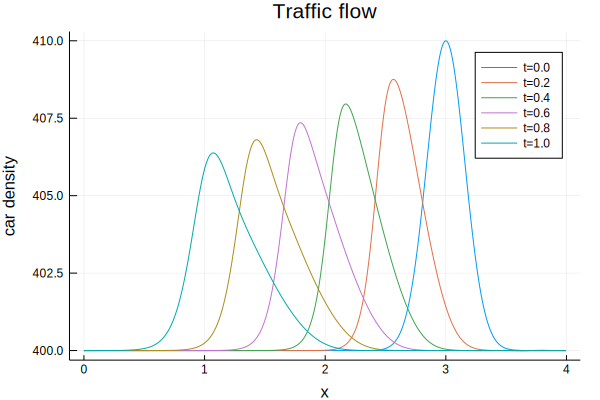

In [4]:
rho_init = @. 400 + 10*exp(-20*(x-3)^2)
using DifferentialEquations
IVP = ODEProblem(ode,rho_init,(0.,1.),0.02)
sol = solve(IVP);

using Plots
plot(x,[sol(t) for t=0:.2:1],label=["t=$t" for t=0:.2:1],
    xaxis=("x"),yaxis=("car density"),title="Traffic flow")     

The bump slowly moves backward on the roadway, spreading out and gradually fading away due to the presence of diffusion.

In [5]:
an = @animate for t = range(0,stop=1,length=80) 
    plot(x,sol(t),
        xaxis=("x"),yaxis=([400,410],"density"),    
        title="Traffic flow, t=$(round(t,digits=2))",leg=:none )
end
gif(an,"traffic1.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/chapter12/traffic1.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/chapter12/traffic1.gif")

Now we use an initial condition with a larger bump. 

In [6]:
rho_init = @. 400 + 80*exp(-16*(x-3)^2)
IVP = ODEProblem(ode,rho_init,(0.,0.5),0.02)
sol = solve(IVP);

In [7]:
an = @animate for t = range(0,stop=0.5,length=80) 
    plot(x,sol(t),
        xaxis=("x"),yaxis=([400,480],"density"),    
        title="A traffic jam",leg=:none )
end
gif(an,"traffic2.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/chapter12/traffic2.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/chapter12/traffic2.gif")

In this case the density bump travels backward along the road. It also steepens on the side facing the incoming traffic and decreases much more slowly on the other side. A motorist would experience this as an abrupt increase in density, followed by a much more gradual decrease in density and resulting gradual increase in speed.